In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('https://www.openml.org/data/get_csv/1592290/phpgNaXZe')

In [ ]:
column = ['sbp','tobacco','ldl','adiposity','famhist','type','obesity','alcohol','age','chd']

In [ ]:
data.columns=column

In [ ]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [ ]:
data.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
type         0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['famhist']=encoder.fit_transform(data['famhist'])
data['chd']=encoder.fit_transform(data['chd'])

In [ ]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,0,60,25.99,57.34,49,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range =(0,100))

# setting scale of max min value for sbp in range of 0-100, normalise
data['sbp'] = scale.fit_transform(data['sbp'].values.reshape(-1,1))

In [ ]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,50.427350,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,36.752137,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,14.529915,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,58.974359,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,28.205128,13.60,3.50,27.78,0,60,25.99,57.34,49,1


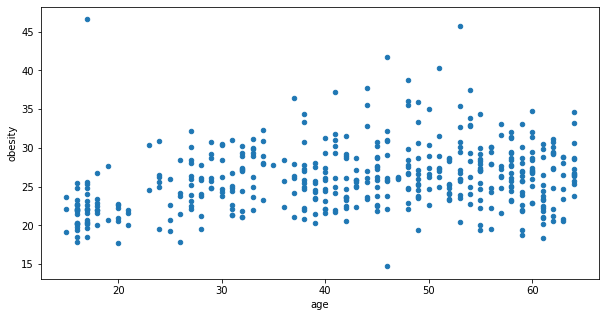

In [ ]:
data.plot(x='age',y='obesity',kind='scatter',figsize =(10,5))

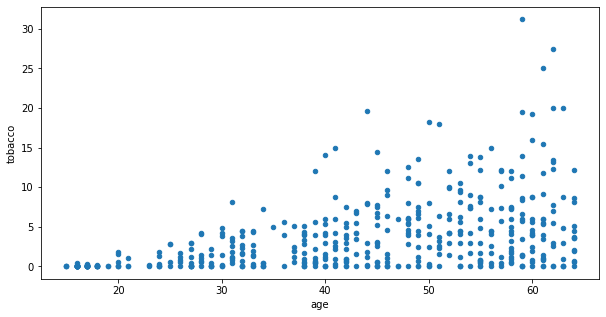

In [ ]:
data.plot(x='age',y='tobacco',kind='scatter',figsize =(10,5))

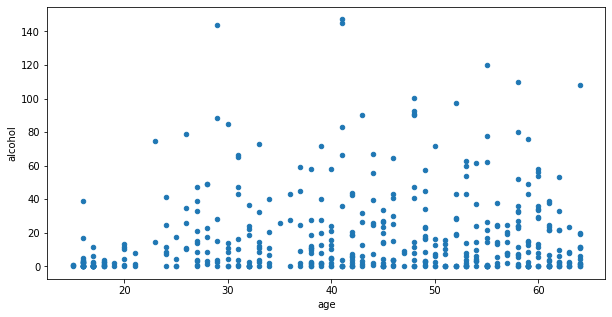

In [ ]:
data.plot(x='age',y='alcohol',kind='scatter',figsize =(10,5))

In [ ]:
# splitting the data into test and train  having a test size of 20% and 80% train size
from sklearn.model_selection import train_test_split
col = ['sbp','tobacco','ldl','adiposity','famhist','type','obesity','alcohol','age']
X_train, X_test, y_train, y_test = train_test_split(data[col], data['chd'], test_size=0.2, random_state=1234)

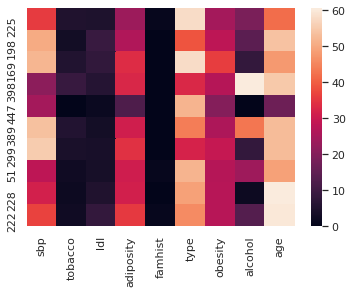

In [ ]:
sns.set()
sns.heatmap(X_train.head(10),robust = True)

In [ ]:
X_all = data[col]
y_all = data['chd']

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [ ]:
ann_clf = MLPClassifier(max_iter=150000)

#Parameters
parameters = {'solver': ['sgd','lbfgs','adam'],
             'alpha':[1e-2,1e-3],
             'hidden_layer_sizes':(9,500,500,2),   # 9 input, 500-500 neuron in 2 layers,1 output layer
             'random_state': [1]
             }

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Type of scoring to compare parameter combos 
acc_scorer = make_scorer(accuracy_score)

# Run grid search 
grid_obj = GridSearchCV(ann_clf, parameters, scoring=acc_scorer,cv=10, n_jobs =-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Pick the best combination of parameters
ann_clf = grid_obj.best_estimator_

In [ ]:
grid_obj.cv_results_

{'mean_fit_time': array([0.30724998, 0.59108615, 0.75088115, 2.85496953, 1.21292353,
        7.97026324, 2.82802136, 1.20035477, 8.01736295, 0.50611975,
        0.10574665, 0.80888243, 0.30271766, 0.62551455, 0.7605881 ,
        2.80725474, 0.49492745, 7.98144758, 2.80572419, 0.49013598,
        8.13374107, 0.50946944, 0.10044239, 0.78714714]),
 'mean_score_time': array([0.0010098 , 0.00098777, 0.00097945, 0.00135553, 0.00143266,
        0.00138874, 0.0013988 , 0.0013617 , 0.00140584, 0.00093844,
        0.00097833, 0.00093193, 0.00094178, 0.00100985, 0.00094926,
        0.00137346, 0.00134411, 0.00141349, 0.00137236, 0.00136943,
        0.00137382, 0.00094609, 0.00097919, 0.00091569]),
 'mean_test_score': array([0.71839339, 0.66403904, 0.71006006, 0.73168168, 0.67762763,
        0.68303303, 0.73168168, 0.67762763, 0.68303303, 0.65322823,
        0.7265015 , 0.72364865, 0.71839339, 0.65600601, 0.71006006,
        0.73168168, 0.66148649, 0.68033033, 0.73168168, 0.66148649,
        0.680

In [ ]:
# Fit the best algorithm to the data 
ann_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=500, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=150000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred_ann = ann_clf.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)
cm_ann

array([[51,  9],
       [16, 17]])

In [ ]:
y_pred_train = ann_clf.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
acc_train*100

75.88075880758808

In [ ]:
ann_result = accuracy_score(y_test,y_pred_ann)
ann_result*100

73.11827956989248

In [ ]:
recall_ann = cm_ann[0][0]/(cm_ann[0][0] + cm_ann[0][1])
precision_ann = cm_ann[0][0]/(cm_ann[0][0]+cm_ann[1][1])
recall_ann*100,precision_ann*100

(85.0, 75.0)

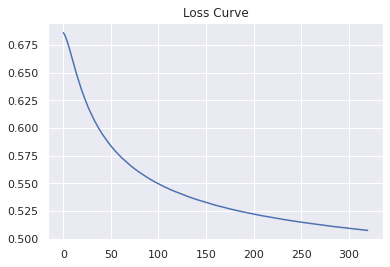

In [ ]:
import matplotlib.pyplot as plt
loss_values = ann_clf.loss_curve_
plt.plot(loss_values)
plt.title('Loss Curve')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarnin

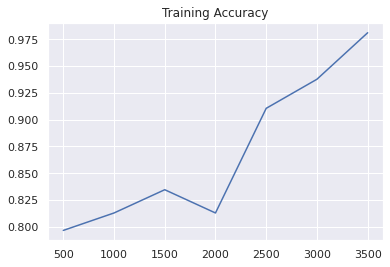

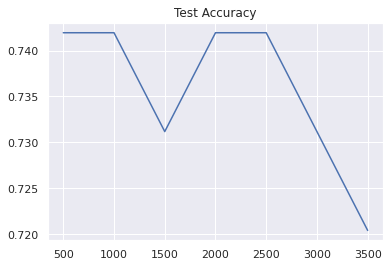

In [ ]:
max_epochs = 3501
train_acc = []
test_acc = []
x = []
i = 500
while i < max_epochs:
  clf = MLPClassifier(hidden_layer_sizes=(500,500,), activation='relu', solver='sgd',alpha=0.0001, batch_size=128, learning_rate='constant', learning_rate_init=0.001, 
                     max_iter=i,shuffle=True, random_state=None, tol=0.0001, verbose=False, n_iter_no_change=10)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_train = clf.predict(X_train)
  acc_train = accuracy_score(y_train, y_pred_train)
  train_acc.append(acc_train)
  acc_test = accuracy_score(y_test, y_pred)
  test_acc.append(acc_test)
  x.append(i)
  i+=500

plt.plot(x,train_acc)
plt.title('Training Accuracy')
plt.show()
plt.plot(x,test_acc)
plt.title('Test Accuracy')
plt.show()

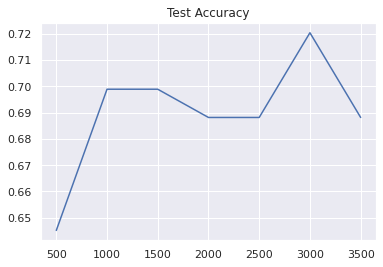

In [ ]:
max_epochs = 3501
train_acc = []
test_acc = []
x = []
i = 500
while i < max_epochs:
  clf = MLPClassifier(hidden_layer_sizes=(500,500,), activation='relu', solver='lbfgs',alpha=0.0001, batch_size=128, learning_rate='adaptive', learning_rate_init=0.001, 
                     max_iter=i,shuffle=True, random_state=None, tol=0.0001, verbose=False, n_iter_no_change=10)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_train = clf.predict(X_train)
  acc_train = accuracy_score(y_train, y_pred_train)
  train_acc.append(acc_train)
  acc_test = accuracy_score(y_test, y_pred)
  test_acc.append(acc_test)
  x.append(i)
  i+=500

plt.plot(x,test_acc)
plt.title('Test Accuracy')
plt.show()

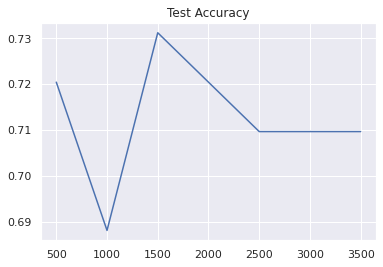

In [ ]:
max_epochs = 3501
train_acc = []
test_acc = []
x = []
i = 500
while i < max_epochs:
  clf = MLPClassifier(hidden_layer_sizes=(500,500,), activation='relu', solver='adam',alpha=0.0001, batch_size=128, learning_rate='adaptive', learning_rate_init=0.001, 
                     max_iter=i,shuffle=True, random_state=None, tol=0.0001, verbose=False, n_iter_no_change=10)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_train = clf.predict(X_train)
  acc_train = accuracy_score(y_train, y_pred_train)
  train_acc.append(acc_train)
  acc_test = accuracy_score(y_test, y_pred)
  test_acc.append(acc_test)
  x.append(i)
  i+=500

plt.plot(x,test_acc)
plt.title('Test Accuracy')
plt.show()

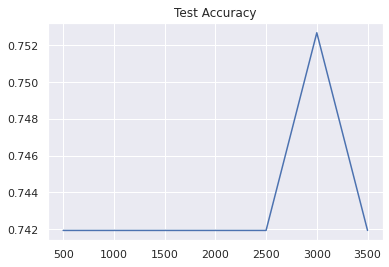

In [ ]:
max_epochs = 3501
train_acc = []
test_acc = []
x = []
i = 500
while i < max_epochs:
  clf = MLPClassifier(hidden_layer_sizes=(500,500,), activation='tanh', solver='sgd',alpha=0.0001, batch_size=128, learning_rate='adaptive', learning_rate_init=0.001, 
                     max_iter=i,shuffle=True, random_state=None, tol=0.0001, verbose=False, n_iter_no_change=10)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_train = clf.predict(X_train)
  acc_train = accuracy_score(y_train, y_pred_train)
  train_acc.append(acc_train)
  acc_test = accuracy_score(y_test, y_pred)
  test_acc.append(acc_test)
  x.append(i)
  i+=500

plt.plot(x,test_acc)
plt.title('Test Accuracy')
plt.show()

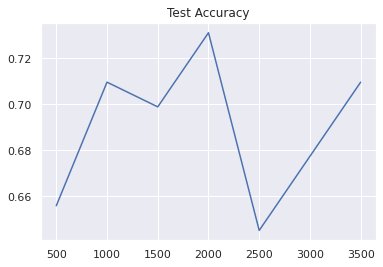

In [ ]:
max_epochs = 3501
train_acc = []
test_acc = []
x = []
i = 500
while i < max_epochs:
  clf = MLPClassifier(hidden_layer_sizes=(500,500,), activation='tanh', solver='lbfgs',alpha=0.0001, batch_size=128, learning_rate='constant', learning_rate_init=0.001, 
                     max_iter=i,shuffle=True, random_state=None, tol=0.0001, verbose=False, n_iter_no_change=10)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_train = clf.predict(X_train)
  acc_train = accuracy_score(y_train, y_pred_train)
  train_acc.append(acc_train)
  acc_test = accuracy_score(y_test, y_pred)
  test_acc.append(acc_test)
  x.append(i)
  i+=500

plt.plot(x,test_acc)
plt.title('Test Accuracy')
plt.show()

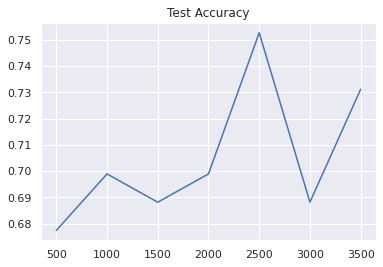

In [ ]:
max_epochs = 3501
train_acc = []
test_acc = []
x = []
i = 500
while i < max_epochs:
  clf = MLPClassifier(hidden_layer_sizes=(500,500,), activation='tanh', solver='adam',alpha=0.0001, batch_size=128, learning_rate='adaptive', learning_rate_init=0.001, 
                     max_iter=i,shuffle=True, random_state=None, tol=0.0001, verbose=False, n_iter_no_change=10)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_train = clf.predict(X_train)
  acc_train = accuracy_score(y_train, y_pred_train)
  train_acc.append(acc_train)
  acc_test = accuracy_score(y_test, y_pred)
  test_acc.append(acc_test)
  x.append(i)
  i+=500

plt.plot(x,test_acc)
plt.title('Test Accuracy')
plt.show()